In [29]:
import numpy as np
import scipy.stats as stats
import scipy.special
#graphing
import matplotlib.pyplot as plt

#optimize
from scipy.optimize import minimize

#interpolate
from scipy.integrate import quad

In [30]:
def optimal_reserve(mu,sigma):
    v = 0
    obj = lambda p :  -1*(p-v)*(1-stats.logistic(loc=mu,scale=sigma).cdf(p))
    result = minimize(obj,[0])
    return result.x
    
print(optimal_reserve(1,30))
print(optimal_reserve(30,30))
print('-----')
print(optimal_reserve(27,.9))
print(optimal_reserve(30,1))

[38.57382899]
[47.01434597]
-----
[24.07635644]
[26.75150666]


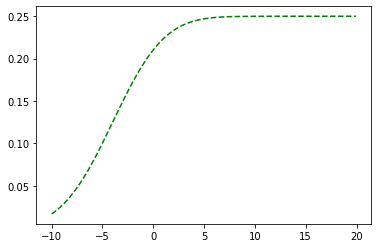

In [36]:
def marginal_effect(beta0,beta1,x):
    mux = beta0+beta1*x
    return stats.norm.cdf(mux)*beta1

beta0 = 1.
beta1 = .25
support_x = np.arange(-10,20,.05)
me = marginal_effect(beta0,beta1,support_x )

plt.plot(support_x, me ,label="tobit",
         color='green',linestyle='--')

In [38]:
def avg_effect(beta0,beta1):
    integrand = lambda x: marginal_effect(beta0,beta1,x)*stats.norm(loc=5,scale=5).pdf(x)
    I = quad(integrand, -100,100)
    return I

print(avg_effect(beta0,beta1))

(0.23001829064529697, 1.3001418865015277e-08)
